## 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import sys
import os
import joblib
import warnings
warnings.filterwarnings('ignore')

# Add src directory to path
sys.path.append('../src')

# Import preprocessing functions
from preprocess import preprocess_text

# Import ML libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Import metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

# Visualization/Plots
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Prepare Data

In [2]:
# Load the dataset
df = pd.read_csv('../dataset/skills_dataset.csv')
print(f"Dataset loaded: {df.shape[0]} records")
df.head()

Dataset loaded: 40 records


,skills,job_role
0,python,ml engineer
1,python numpy pandas,data analyst
2,python deep learning tensorflow,ai engineer
3,sql excel powerbi,data analyst
4,java spring sql,backend developer


In [3]:
# Apply preprocessing
df['skills_clean'] = df['skills'].apply(preprocess_text)
print("Text preprocessing completed!")

Text preprocessing completed!


In [4]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(
    max_features=100,
    ngram_range=(1, 2),
    min_df=1,
    max_df=0.8
)

X = tfidf.fit_transform(df['skills_clean'])
print(f"Feature matrix shape: {X.shape}")

Feature matrix shape: (40, 100)


In [5]:
# Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['job_role'])
print(f"Target encoded: {len(y)} samples, {len(label_encoder.classes_)} classes")
print(f"Classes: {label_encoder.classes_}")

Target encoded: 40 samples, 11 classes
Classes: ['ai engineer' 'backend developer' 'data analyst' 'data engineer'
 'data scientist' 'database administrator' 'devops engineer'
 'frontend developer' 'ml engineer' 'mobile developer' 'qa engineer']


In [6]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 32 samples
Testing set: 8 samples


## 3. Model 1: Logistic Regression

In [7]:
# Train Logistic Regression
print("Training Logistic Regression...")
lr_model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    multi_class='multinomial'
)
lr_model.fit(X_train, y_train)
print("Training completed!")

Training Logistic Regression...
Training completed!


In [8]:
# Make predictions
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

print("Predictions generated!")

Predictions generated!


In [9]:
# Evaluate Logistic Regression
lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_test_acc = accuracy_score(y_test, lr_test_pred)
lr_precision = precision_score(y_test, lr_test_pred, average='weighted', zero_division=0)
lr_recall = recall_score(y_test, lr_test_pred, average='weighted', zero_division=0)
lr_f1 = f1_score(y_test, lr_test_pred, average='weighted', zero_division=0)

print("="*60)
print("LOGISTIC REGRESSION PERFORMANCE")
print("="*60)
print(f"Training Accuracy:   {lr_train_acc:.4f} ({lr_train_acc*100:.2f}%)")
print(f"Testing Accuracy:    {lr_test_acc:.4f} ({lr_test_acc*100:.2f}%)")
print(f"Precision (weighted): {lr_precision:.4f}")
print(f"Recall (weighted):    {lr_recall:.4f}")
print(f"F1-Score (weighted):  {lr_f1:.4f}")
print("="*60)

LOGISTIC REGRESSION PERFORMANCE
Training Accuracy:   0.8750 (87.50%)
Testing Accuracy:    0.3750 (37.50%)
Precision (weighted): 0.2167
Recall (weighted):    0.3750
F1-Score (weighted):  0.2714


In [24]:
# Classification Report - Logistic Regression
print("\nClassification Report - Logistic Regression:")
print(classification_report(
    y_test, 
    lr_test_pred, 
    labels=range(len(label_encoder.classes_)),
    target_names=label_encoder.classes_,
    zero_division=0
))


Classification Report - Logistic Regression:
                        precision    recall  f1-score   support

           ai engineer       0.00      0.00      0.00         1
     backend developer       0.20      0.50      0.29         2
          data analyst       0.00      0.00      0.00         1
         data engineer       0.00      0.00      0.00         0
        data scientist       0.00      0.00      0.00         0
database administrator       0.00      0.00      0.00         0
       devops engineer       0.00      0.00      0.00         0
    frontend developer       0.67      1.00      0.80         2
           ml engineer       0.00      0.00      0.00         1
      mobile developer       0.00      0.00      0.00         0
           qa engineer       0.00      0.00      0.00         1

              accuracy                           0.38         8
             macro avg       0.08      0.14      0.10         8
          weighted avg       0.22      0.38      0.27   

## 4. Model 2: Random Forest Classifier

In [12]:
# Train Random Forest
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)
print("Training completed!")

Training Random Forest Classifier...
Training completed!


In [13]:
# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

print("Predictions generated!")

Predictions generated!


In [14]:
# Evaluate Random Forest
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)
rf_precision = precision_score(y_test, rf_test_pred, average='weighted', zero_division=0)
rf_recall = recall_score(y_test, rf_test_pred, average='weighted', zero_division=0)
rf_f1 = f1_score(y_test, rf_test_pred, average='weighted', zero_division=0)

print("="*60)
print("RANDOM FOREST PERFORMANCE")
print("="*60)
print(f"Training Accuracy:   {rf_train_acc:.4f} ({rf_train_acc*100:.2f}%)")
print(f"Testing Accuracy:    {rf_test_acc:.4f} ({rf_test_acc*100:.2f}%)")
print(f"Precision (weighted): {rf_precision:.4f}")
print(f"Recall (weighted):    {rf_recall:.4f}")
print(f"F1-Score (weighted):  {rf_f1:.4f}")
print("="*60)

RANDOM FOREST PERFORMANCE
Training Accuracy:   1.0000 (100.00%)
Testing Accuracy:    0.6250 (62.50%)
Precision (weighted): 0.6042
Recall (weighted):    0.6250
F1-Score (weighted):  0.5750


In [23]:
# Classification Report - Random Forest
print("\nClassification Report - Random Forest:")
print(classification_report(
    y_test, 
    rf_test_pred, 
    labels=range(len(label_encoder.classes_)),
    target_names=label_encoder.classes_,
    zero_division=0
))


Classification Report - Random Forest:
                        precision    recall  f1-score   support

           ai engineer       1.00      1.00      1.00         1
     backend developer       1.00      0.50      0.67         2
          data analyst       0.00      0.00      0.00         1
         data engineer       0.00      0.00      0.00         0
        data scientist       0.00      0.00      0.00         0
database administrator       0.00      0.00      0.00         0
       devops engineer       0.00      0.00      0.00         0
    frontend developer       0.67      1.00      0.80         2
           ml engineer       0.50      1.00      0.67         1
      mobile developer       0.00      0.00      0.00         0
           qa engineer       0.00      0.00      0.00         1

              accuracy                           0.62         8
             macro avg       0.29      0.32      0.28         8
          weighted avg       0.60      0.62      0.57         

## 5. Model Comparison

In [16]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Train Accuracy': [lr_train_acc, rf_train_acc],
    'Test Accuracy': [lr_test_acc, rf_test_acc],
    'Precision': [lr_precision, rf_precision],
    'Recall': [lr_recall, rf_recall],
    'F1-Score': [lr_f1, rf_f1]
})

print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


MODEL COMPARISON
              Model  Train Accuracy  Test Accuracy  Precision  Recall  F1-Score
Logistic Regression           0.875          0.375   0.216667   0.375  0.271429
      Random Forest           1.000          0.625   0.604167   0.625  0.575000


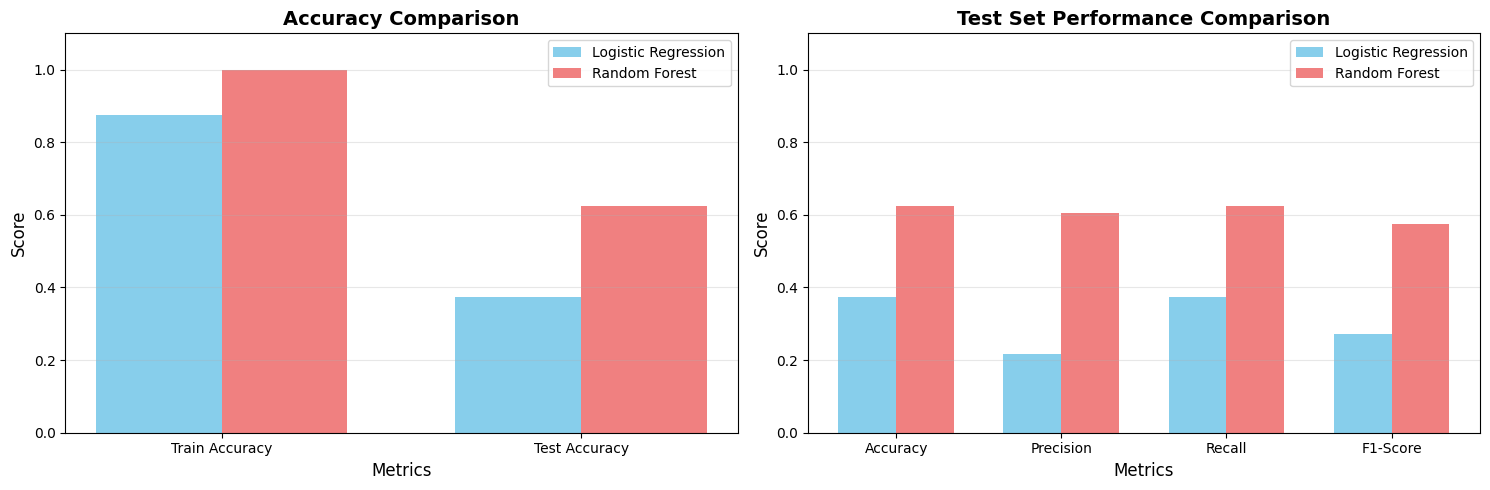

In [17]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Accuracy Comparison
metrics = ['Train Accuracy', 'Test Accuracy']
lr_scores = [lr_train_acc, lr_test_acc]
rf_scores = [rf_train_acc, rf_test_acc]

x = np.arange(len(metrics))
width = 0.35

axes[0].bar(x - width/2, lr_scores, width, label='Logistic Regression', color='skyblue')
axes[0].bar(x + width/2, rf_scores, width, label='Random Forest', color='lightcoral')
axes[0].set_xlabel('Metrics', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].set_ylim([0, 1.1])
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Test Metrics Comparison
test_metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_test_scores = [lr_test_acc, lr_precision, lr_recall, lr_f1]
rf_test_scores = [rf_test_acc, rf_precision, rf_recall, rf_f1]

x2 = np.arange(len(test_metrics))

axes[1].bar(x2 - width/2, lr_test_scores, width, label='Logistic Regression', color='skyblue')
axes[1].bar(x2 + width/2, rf_test_scores, width, label='Random Forest', color='lightcoral')
axes[1].set_xlabel('Metrics', fontsize=12)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Test Set Performance Comparison', fontsize=14, fontweight='bold')
axes[1].set_xticks(x2)
axes[1].set_xticklabels(test_metrics)
axes[1].legend()
axes[1].set_ylim([0, 1.1])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Select Best Model

In [18]:
# Determine best model based on F1-score
if lr_f1 >= rf_f1:
    best_model = lr_model
    best_model_name = 'Logistic Regression'
    best_accuracy = lr_test_acc
    best_f1 = lr_f1
    best_precision = lr_precision
    best_recall = lr_recall
else:
    best_model = rf_model
    best_model_name = 'Random Forest'
    best_accuracy = rf_test_acc
    best_f1 = rf_f1
    best_precision = rf_precision
    best_recall = rf_recall

print("\n" + "="*60)
print("BEST MODEL SELECTION")
print("="*60)
print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"F1-Score: {best_f1:.4f}")
print(f"Precision: {best_precision:.4f}")
print(f"Recall: {best_recall:.4f}")
print("="*60)


BEST MODEL SELECTION
Best Model: Random Forest
Test Accuracy: 0.6250 (62.50%)
F1-Score: 0.5750
Precision: 0.6042
Recall: 0.6250


## 7. Save Best Model

In [19]:
# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save the best model
model_path = '../models/career_prediction_model.pkl'
joblib.dump(best_model, model_path)
print(f"Best model saved to: {model_path}")

# Save the vectorizer and label encoder as well
joblib.dump(tfidf, '../models/tfidf_vectorizer.pkl')
joblib.dump(label_encoder, '../models/label_encoder.pkl')
print("TF-IDF vectorizer and label encoder saved!")

Best model saved to: ../models/career_prediction_model.pkl
TF-IDF vectorizer and label encoder saved!


## 8. Save Metrics to File

In [20]:
# Create results directory if it doesn't exist
os.makedirs('../results', exist_ok=True)

# Save metrics to file
with open('../results/metrics.txt', 'w') as f:
    f.write("="*60 + "\n")
    f.write("MODEL TRAINING RESULTS - DAY 3\n")
    f.write("Student Skill Gap Analyzer & Career Recommendation System\n")
    f.write("="*60 + "\n\n")
    
    f.write("DATASET INFORMATION:\n")
    f.write("-" * 60 + "\n")
    f.write(f"Total Samples: {len(df)}\n")
    f.write(f"Training Samples: {X_train.shape[0]}\n")
    f.write(f"Testing Samples: {X_test.shape[0]}\n")
    f.write(f"Number of Classes: {len(label_encoder.classes_)}\n\n")
    
    f.write("MODEL COMPARISON:\n")
    f.write("-" * 60 + "\n")
    f.write(f"{'Model':<25} {'Train Acc':<12} {'Test Acc':<12} {'F1-Score':<12}\n")
    f.write("-" * 60 + "\n")
    f.write(f"{'Logistic Regression':<25} {lr_train_acc:<12.4f} {lr_test_acc:<12.4f} {lr_f1:<12.4f}\n")
    f.write(f"{'Random Forest':<25} {rf_train_acc:<12.4f} {rf_test_acc:<12.4f} {rf_f1:<12.4f}\n\n")
    
    f.write("BEST MODEL:\n")
    f.write("-" * 60 + "\n")
    f.write(f"Model Used: {best_model_name}\n")
    f.write(f"Test Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)\n")
    f.write(f"Precision: {best_precision:.4f}\n")
    f.write(f"Recall: {best_recall:.4f}\n")
    f.write(f"F1-Score: {best_f1:.4f}\n\n")
    
    f.write("SAVED MODEL FILES:\n")
    f.write("-" * 60 + "\n")
    f.write(f"Model: models/career_prediction_model.pkl\n")
    f.write(f"Vectorizer: models/tfidf_vectorizer.pkl\n")
    f.write(f"Label Encoder: models/label_encoder.pkl\n")

print("\nMetrics saved to: ../results/metrics.txt")


Metrics saved to: ../results/metrics.txt


## 9. Test Prediction Example

In [21]:
# Example: Predict career for new skills
def predict_career(skills_text):
    """Predict career based on skills"""
    # Preprocess
    cleaned_skills = preprocess_text(skills_text)
    
    # Vectorize
    skills_vector = tfidf.transform([cleaned_skills])
    
    # Predict
    prediction = best_model.predict(skills_vector)
    predicted_job = label_encoder.inverse_transform(prediction)[0]
    
    # Get probability scores
    if hasattr(best_model, 'predict_proba'):
        probabilities = best_model.predict_proba(skills_vector)[0]
        confidence = probabilities.max()
    else:
        confidence = 1.0
    
    return predicted_job, confidence

# Test examples
test_examples = [
    "python machine learning tensorflow",
    "java spring boot microservices",
    "react javascript typescript",
    "sql tableau data analysis"
]

print("\n" + "="*60)
print("PREDICTION EXAMPLES")
print("="*60)
for skills in test_examples:
    job, conf = predict_career(skills)
    print(f"\nSkills: {skills}")
    print(f"Predicted Job Role: {job}")
    print(f"Confidence: {conf:.2%}")
print("="*60)


PREDICTION EXAMPLES

Skills: python machine learning tensorflow
Predicted Job Role: ai engineer
Confidence: 47.59%

Skills: java spring boot microservices
Predicted Job Role: backend developer
Confidence: 67.29%

Skills: react javascript typescript
Predicted Job Role: frontend developer
Confidence: 49.38%

Skills: sql tableau data analysis
Predicted Job Role: backend developer
Confidence: 30.33%


## 10. Summary

**Models Trained:**
1. Logistic Regression
2. Random Forest Classifier

**Key Achievements:**
- Successfully trained multiple classification models
- Evaluated models using multiple metrics (accuracy, precision, recall, F1-score)
- Compared model performance
- Saved best model for deployment

**Model Files Saved:**
- `models/career_prediction_model.pkl` - Best trained model
- `models/tfidf_vectorizer.pkl` - Feature vectorizer
- `models/label_encoder.pkl` - Label encoder
- `results/metrics.txt` - Performance metrics

**Next Steps (Day 4):**
1. Create skill gap analysis functionality
2. Build career recommendation engine
3. Create interactive prediction interface
4. Final documentation and deployment preparation